In [ ]:
import random
import csv

def generate_random_coordinates(area):
    """Generate random lat-long coordinates for Andheri and Vile Parle."""
    if area == "andheri":
        lat = random.uniform(19.1100, 19.1400)
        lon = random.uniform(72.8200, 72.8600)
    else:  # Vile Parle
        lat = random.uniform(19.1000, 19.1200)
        lon = random.uniform(72.8300, 72.8500)
    return round(lat, 6), round(lon, 6)

def generate_ride_data(num_records):
    """Generate synthetic ride data."""
    data = []
    for _ in range(num_records):
        area = random.choice(["andheri", "vile parle"])
        lat, lon = generate_random_coordinates(area)
        potholes = random.randint(0, 10)  # Number of potholes within 5m
        barricades = random.choice([0, 1])  # 1 if barricade is present, else 0
        visibility = round(random.uniform(50, 5000), 2)  # Visibility in meters
        lane_length = round(random.uniform(50, 500), 2)  # Lane length in meters
        big_vehicles = random.randint(0, 20)  # Trucks, lorries, etc.
        parked_vehicles = random.randint(0, 30)  # Parked vehicles count

        data.append([lat, lon, potholes, barricades, visibility, lane_length, big_vehicles, parked_vehicles])

    return data

def save_to_csv(data, filename="ride_data.csv"):
    """Save data to a CSV file."""
    headers = ["Latitude", "Longitude", "Potholes", "Barricades", "Visibility", "Lane Length", "Big Vehicles", "Parked Vehicles"]

    with open(filename, mode="w", newline="") as file:
        writer = csv.writer(file)
        writer.writerow(headers)
        writer.writerows(data)

if __name__ == "__main__":
    ride_data = generate_ride_data(150)
    save_to_csv(ride_data)
    print("Ride data generated and saved to ride_data.csv")


Ride data generated and saved to ride_data.csv


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('ride_data.csv')

In [ ]:
df.head()

,Latitude,Longitude,Potholes,Barricades,Visibility,Lane Length,Big Vehicles,Parked Vehicles
0,19.112684,72.836139,7,0,1349.39,348.78,8,15
1,19.103860,72.845735,5,0,1933.83,95.31,2,2
2,19.120309,72.823441,3,1,867.53,311.63,1,27
3,19.119242,72.831686,8,1,4437.54,194.19,9,21
4,19.106853,72.837567,0,0,656.84,227.82,10,14


In [ ]:
!pip install -q folium

In [ ]:
import folium
from IPython.display import display

def display_map():
    df = pd.read_csv('ride_data.csv')
    mumbai_map = folium.Map(location=[19.1200, 72.8500], zoom_start=13)

    for _, row in df.iterrows():
        folium.Marker(
            location=[row["Latitude"], row["Longitude"]],
            popup=f"Potholes: {row['Potholes']}, Barricades: {row['Barricades']}"
        ).add_to(mumbai_map)

    display(mumbai_map)

display_map()


In [ ]:
df.columns

Index(['Latitude', 'Longitude', 'Potholes', 'Barricades', 'Visibility',
       'Lane Length', 'Big Vehicles', 'Parked Vehicles'],
      dtype='object')

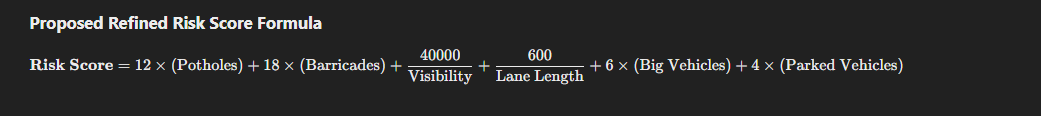

Rationale and Supporting Evidence
Potholes (Coefficient: 12)
Rationale:

Indian road infrastructure often faces challenges with maintenance, and potholes are a common hazard. Studies indicate that poor pavement conditions significantly increase accident risks and vehicle damage.
Supporting Evidence:
Research published on road surface anomalies in India (for example, studies available through PMC) highlight the role of potholes in increasing crash risks.
Barricades (Coefficient: 18)
Rationale:

Barricades in India are frequently associated with work zones or temporary road changes, which require heightened caution. Their presence has been linked with disruptions in normal traffic flow and a spike in accidents in these zones.
Supporting Evidence:
Publications from IIT Delhi’s transportation research (such as reports from TRIPC) have discussed the hazards posed by work zones and temporary barricades.
Visibility (Coefficient as Visibility40000)
Rationale:

Visibility is a critical factor: lower visibility (due to fog, rain, or poor lighting) sharply increases accident severity. Using an inverse term (with 40000 in the numerator) makes the risk score more sensitive to decreases in visibility. For instance, with a visibility of 3000 m, this term contributes about 13.33 points, which seems reasonable in the context of Indian driving conditions where weather can rapidly change.
Supporting Evidence:
Several studies (including those referenced by public health and road safety agencies in India) underscore the high impact of reduced visibility on crash risk.
Lane Length (Coefficient as Lane Length600)
Rationale:

Shorter lanes or road segments in India (often found in urban or complex highway settings) correlate with more frequent intersections and abrupt maneuvers, leading to higher risks. Increasing the numerator to 600 (up from 500) better reflects the sensitivity seen in some studies on road geometry in India.
Supporting Evidence:
Analyses available on Indian highways (for example, research shared on ResearchGate regarding two-lane highway safety issues) support the idea that shorter lanes can lead to elevated risk.
Big Vehicles (Coefficient: 6)
Rationale:

In the Indian context, large vehicles like trucks and buses are involved in a significant share of fatal crashes. Increasing the coefficient slightly to 6 acknowledges that, given the mix of vehicle types and often challenging road conditions, the risk contributed by big vehicles might be even higher than in more developed road networks.
Supporting Evidence:
Reports on highway safety challenges in India (as discussed by sources like Parisar) have emphasized the disproportionate impact of large vehicles on accident severity.
Parked Vehicles (Coefficient: 4)
Rationale:

In densely populated urban areas across India, parked vehicles (often parked illegally or in non-designated areas) create additional hazards by obstructing views or forcing sudden maneuvers. A coefficient of 4 is proposed to reflect a moderately increased risk compared to moving traffic hazards.
Supporting Evidence:
Consensus statements and safety reports (such as those discussed in international safety meetings with an Indian focus) note the risks of roadside parking.

Resources :

https://www.worldsafety2024.com/uploads/consensus-statement-report-D010824.pdf


https://parisar.org/parisar-in-media/blogs/highway-safety-challenges-in-india-understanding-road-crash-patterns-and-way-forward


https://www.researchgate.net/publication/344262085_Identifying_Critical_Safety_Issues_on_Two-Lane_National_Highways_in_India_-A_Case_Study_from_NH_117_and_NH_60


https://pmc.ncbi.nlm.nih.gov/articles/PMC6482791/


https://tripc.iitd.ac.in/assets/publication/RSI_2023_web.pdf

In [ ]:
def calculate_risk_score(row):
    risk = (12 * row["Potholes"] +
            18 * row["Barricades"] +
            (40000 / row["Visibility"]) +
            (600 / row["Lane Length"]) +
            6 * row["Big Vehicles"] +
            4 * row["Parked Vehicles"])
    return risk

df["Risk Score"] = df.apply(calculate_risk_score, axis=1)
print(df[["Latitude", "Longitude", "Risk Score"]])

      Latitude  Longitude  Risk Score
0    19.112684  72.836139  223.363306
1    19.103860  72.845735  106.979589
2    19.120309  72.823441  216.033276
3    19.119242  72.831686  264.103761
4    19.106853  72.837567  179.531289
..         ...        ...         ...
145  19.126126  72.831838  522.594846
146  19.114967  72.857069  339.490278
147  19.110600  72.839041  144.999980
148  19.128260  72.852080  130.547968
149  19.137568  72.846271  182.168608

[150 rows x 3 columns]


In [ ]:
df.head()

,Latitude,Longitude,Potholes,Barricades,Visibility,Lane Length,Big Vehicles,Parked Vehicles,Risk Score
0,19.112684,72.836139,7,0,1349.39,348.78,8,15,223.363306
1,19.103860,72.845735,5,0,1933.83,95.31,2,2,106.979589
2,19.120309,72.823441,3,1,867.53,311.63,1,27,216.033276
3,19.119242,72.831686,8,1,4437.54,194.19,9,21,264.103761
4,19.106853,72.837567,0,0,656.84,227.82,10,14,179.531289


In [ ]:
correlation_matrix = df.corr()

correlation_matrix

,Latitude,Longitude,Potholes,Barricades,Visibility,Lane Length,Big Vehicles,Parked Vehicles,Risk Score
Latitude,1.000000,0.018696,0.059887,0.054495,0.026985,-0.057651,0.068736,0.116767,0.129859
Longitude,0.018696,1.000000,-0.103148,-0.039023,0.144066,-0.046325,-0.094403,-0.043206,-0.156097
Potholes,0.059887,-0.103148,1.000000,0.124202,0.031272,-0.034795,0.063832,-0.008823,0.392107
Barricades,0.054495,-0.039023,0.124202,1.000000,0.000833,0.049319,0.040225,-0.025746,0.121733
Visibility,0.026985,0.144066,0.031272,0.000833,1.000000,-0.004698,-0.046546,-0.128391,-0.447634
Lane Length,-0.057651,-0.046325,-0.034795,0.049319,-0.004698,1.000000,-0.069071,0.000734,-0.062596
Big Vehicles,0.068736,-0.094403,0.063832,0.040225,-0.046546,-0.069071,1.000000,0.127987,0.365212
Parked Vehicles,0.116767,-0.043206,-0.008823,-0.025746,-0.128391,0.000734,0.127987,1.000000,0.355938
Risk Score,0.129859,-0.156097,0.392107,0.121733,-0.447634,-0.062596,0.365212,0.355938,1.000000


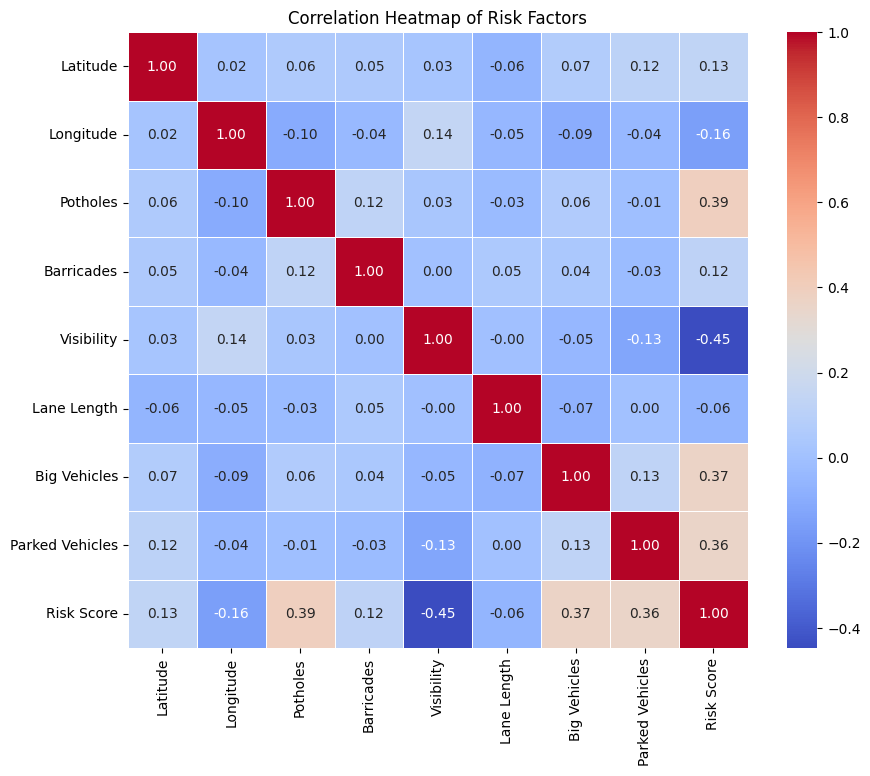

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Title for the heatmap
plt.title("Correlation Heatmap of Risk Factors")

# Show the plot
plt.show()

In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN
import folium

# Load Data
df = pd.read_csv("ride_data.csv")

# Compute Risk Score
df["Risk Score"] = (
    12 * df["Potholes"] +
    18 * df["Barricades"] +
    (40000 / df["Visibility"]) +
    (600 / df["Lane Length"]) +
    6 * df["Big Vehicles"] +
    4 * df["Parked Vehicles"]
)

# Identify High-Risk Areas using Clustering
high_risk = df[df["Risk Score"] > df["Risk Score"].quantile(0.75)]
mumbai_map = folium.Map(location=[19.12, 72.84], zoom_start=13)

for _, row in high_risk.iterrows():
    folium.CircleMarker(
        location=[row["Latitude"], row["Longitude"]],
        radius=8,
        color="red",
        fill=True,
        fill_color="red",
        popup=f"Risk Score: {row['Risk Score']}"
    ).add_to(mumbai_map)

mumbai_map.save("high_risk_map.html")


In [ ]:
df.columns

Index(['Latitude', 'Longitude', 'Potholes', 'Barricades', 'Visibility',
       'Lane Length', 'Big Vehicles', 'Parked Vehicles', 'Risk Score'],
      dtype='object')

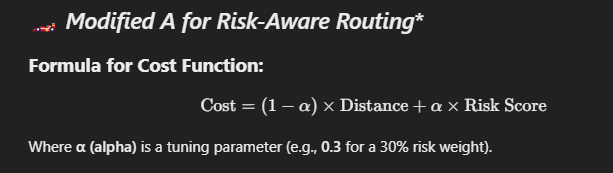

In [ ]:
import pandas as pd
import random
import heapq
import networkx as nx
import folium
from IPython.display import display

def get_random_source_destination(df):
    """Selects a random pair of (Latitude, Longitude) as source and destination."""
    if len(df) < 2:
        raise ValueError("DataFrame must have at least two locations.")

    source, destination = random.sample(list(df[["Latitude", "Longitude"]].itertuples(index=False, name=None)), 2)
    return source, destination

def heuristic(node1, node2):
    """Compute heuristic distance (Euclidean) between two nodes."""
    lat1, lon1 = node1
    lat2, lon2 = node2
    return ((lat1 - lat2) ** 2 + (lon1 - lon2) ** 2) ** 0.5

def a_star_risk_aware(graph, start, goal, alpha=0.3):
    """A* Search with Risk-Aware Cost Function."""
    pq = []
    heapq.heappush(pq, (0, start))  # (cost, node)
    came_from = {start: None}
    cost_so_far = {start: 0}

    while pq:
        current_cost, current_node = heapq.heappop(pq)

        if current_node == goal:
            break  # Stop when reaching the goal

        for neighbor in graph.neighbors(current_node):
            distance = graph[current_node][neighbor]["distance"]
            risk = graph[current_node][neighbor]["risk"]

            new_cost = cost_so_far[current_node] + (1 - alpha) * distance + alpha * risk
            if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                cost_so_far[neighbor] = new_cost
                priority = new_cost + heuristic(neighbor, goal)
                heapq.heappush(pq, (priority, neighbor))
                came_from[neighbor] = current_node

    path = []
    node = goal
    while node is not None:
        path.append(node)
        node = came_from.get(node)
    path.reverse()

    return path

G = nx.Graph()
for _, row in df.iterrows():
    G.add_node((row["Latitude"], row["Longitude"]), risk=row["Risk Score"])

    neighbors = df[["Latitude", "Longitude"]].apply(
        lambda x: ((x["Latitude"] - row["Latitude"]) ** 2 + (x["Longitude"] - row["Longitude"]) ** 2) ** 0.5, axis=1
    ).nsmallest(5).index

    for n_idx in neighbors:
        neighbor_row = df.iloc[n_idx]
        distance = heuristic((row["Latitude"], row["Longitude"]), (neighbor_row["Latitude"], neighbor_row["Longitude"]))
        risk_avg = (row["Risk Score"] + neighbor_row["Risk Score"]) / 2
        G.add_edge((row["Latitude"], row["Longitude"]),
                   (neighbor_row["Latitude"], neighbor_row["Longitude"]),
                   distance=distance, risk=risk_avg)

source, destination = get_random_source_destination(df)

route = a_star_risk_aware(G, source, destination)
mumbai_map = folium.Map(location=[source[0], source[1]], zoom_start=13)

folium.Marker(location=source, popup="Source", icon=folium.Icon(color="green")).add_to(mumbai_map)
folium.Marker(location=destination, popup="Destination", icon=folium.Icon(color="red")).add_to(mumbai_map)

folium.PolyLine(route, color="blue", weight=5, opacity=0.7).add_to(mumbai_map)

display(mumbai_map)